<ul>
    <li><a href= "#intro">Introduction</a></li>
    <li><a href= "#uni">Univariate Exploration</a></li>
    <li><a href= "#biv">Bivariate Exploration<a/></li>
    <li><a href= "#multi">Multivariate Exploration
        <li><a href= "#con">Conclusion
 </ul>   <a/></li>

<a id = "intro"></a>
# Introduction:  Ford GoBike System Data Exploration
### by Onuh Kingsley

## Preliminary Wrangling

In [1]:
# Import all needed packages and set plot to be inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import datetime
import calendar

In [2]:
# Load in the GoBike Dataset into the pandas dataframe 
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Assess the dataset 
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
# descriptive statistics for numeric variables/features
print(df.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?

> There are <b style="color:green;">one hundred and eighty three thousand four and hundred twelve (183,412) </b></b>runners and 16 features

### What is/are the main feature(s) of interest in your dataset?

> The following are the main features in the GoBike dataset
    start_time, end_time, duration_sec, start_station_name, end_station_name, user_type, member_gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_time, end_time, duration_sec for me are the main feature in the dataset that will tell us when most trips are taken in terms of time of day, day of the week, or month of the year.

In [5]:
# Show more informstion about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
# Data wrangling
df_clean = df.copy()

# Define

### Change the data type for start and end time, start and end station id, member birth year and bike share for all trip features, fill missing member birth year with 0

# Code

In [7]:
# Change data type
time = ['start_time', 'end_time']
station_id = ['start_station_id', 'end_station_id']
df_clean[time] = df_clean[time].astype('datetime64[ns]')
df_clean[station_id] = df_clean[station_id].round()
df_clean[station_id] = df_clean[station_id].astype('Int64')
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int64')
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype('category')

# Test

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  Int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  Int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
# Take a look at the dataset few rows
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No


# Define
Replace NaN in member gender column with no gender

# Code

In [10]:
df_clean['member_gender'] = df_clean['member_gender'].replace(np.nan, 'No_gender')

In [11]:
# Test
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,No_gender,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes


<a id = "uni"></a>
## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: duration_sec

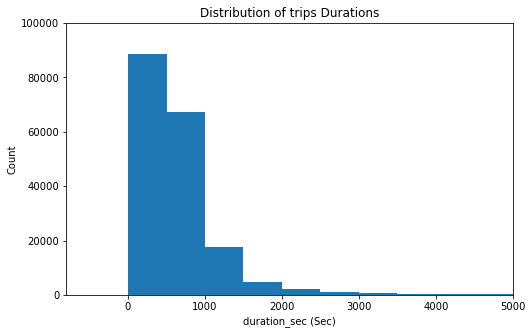

In [12]:
# start with a standard-scaled plot to see time spent for the trip
binsize = 500
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of trips Durations')
plt.xlabel('duration_sec (Sec)')
plt.ylabel('Count')
plt.axis([-800, 5000, 0, 100000])
plt.show()

There's a long tail in the distribution and most of the trip took place between 0 and 800 seconds

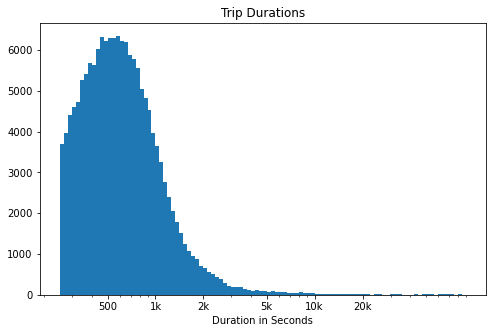

In [13]:
# There's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Trip Durations')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration in Seconds')
plt.show()

From the distribution above, most trip durations is around 600 seconds which is 10 minutes

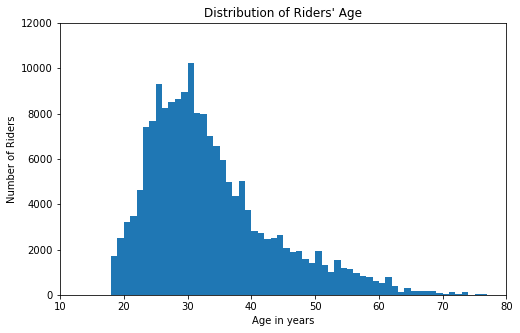

In [14]:
# Age distribution using members' birth year using the lowest age 1939 to the 2009.
binsize = 1
bins = np.arange(0, df_clean['member_birth_year'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_birth_year', bins = bins)
plt.axis([1979, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title("Distribution of Riders' Age")
plt.xlabel('Age in years')
plt.ylabel('Number of Riders')
plt.show()

From the distribution above, we can see that the age distribution is more concentrated between 20 to 40 years.

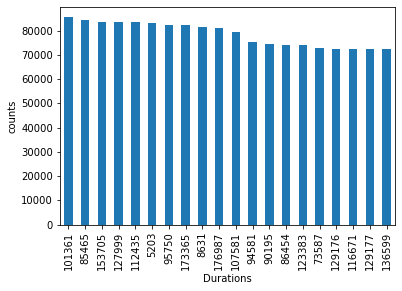

In [15]:
# Show popular top 20 duration_sec and plotting it on bar.
df_clean_ride_top_10 = df_clean['duration_sec'].nlargest(20).plot(kind = 'bar')
plt.xlabel('Durations')
plt.ylabel('counts')
plt.show()

The above result shows the top 20 trip durations.

In [16]:
# Let look at other feature of interest 
def plots(data, x_axis, y_axiz):
    plt.figure(figsize=[8,5])
    
    plt.bar(x = data.value_counts().keys(), height = data.value_counts())
    plt.xlabel(x_axis)
    plt.ylabel(y_axiz)
    plt.show()
    return


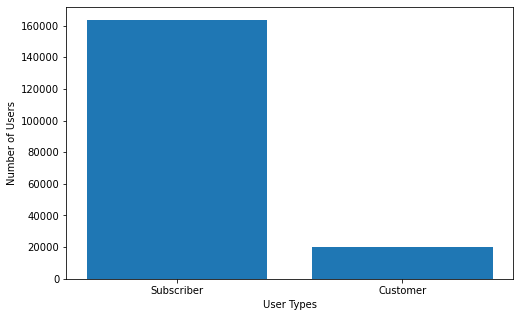

In [17]:
# A bar chart showing the both the customers and subscribers
plots(df_clean.user_type, "User Types", "Number of Users")

A bar chart showing the number of riders based on user type (customers and subscribers)

In [18]:
# Get the different months from the datetime
df_clean['start_month_no'] = df_clean['start_time'].apply(lambda time: time.month)
df_clean['end_month_no'] = df_clean['end_time'].apply(lambda time: time.month)
df_clean['start_month'] = df_clean['start_month_no'].apply(lambda x: calendar.month_abbr[x])
df_clean['end_month'] = df_clean['end_month_no'].apply(lambda x: calendar.month_abbr[x])

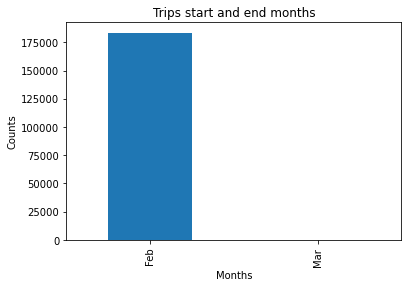

In [19]:
df_clean['end_month'].value_counts().plot(kind = 'bar')
plt.title('Trips start and end months')
plt.xlabel('Months')
plt.ylabel('Counts');

From the result above, most of the trip started and ended in the month of february 2019.

In [20]:
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month_no,end_month_no,start_month,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2,3,Feb,Mar
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,0,No_gender,No,2,3,Feb,Mar
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2,3,Feb,Mar
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2,3,Feb,Mar
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2,3,Feb,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,2,2,Feb,Feb
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,2,2,Feb,Feb
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,2,2,Feb,Feb
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,2,2,Feb,Feb


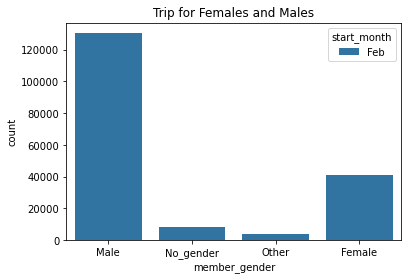

In [21]:
# A bar chart showing both Male and Female trips in February
df_b = sns.countplot(x=df_clean.member_gender, hue=df_clean.start_month, data=df_clean)
df_b.set_title("Trip for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show()

A bar chart showing both Male and Female trips in the month of February

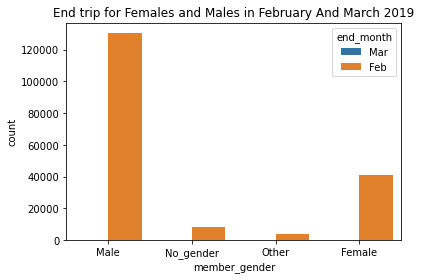

In [22]:
# A bar chart show both Male and Female that end their trip in the month of February and March 2019
df_b = sns.countplot(x=df_clean.member_gender, hue=df_clean.end_month, data=df_clean)
df_b.set_title("End trip for Females and Males in February And March 2019")
x_ticks_labels=['Female', 'Male']
plt.show()

A bar chart showing both Male and Female that ended their trip in the month of February and March 2019

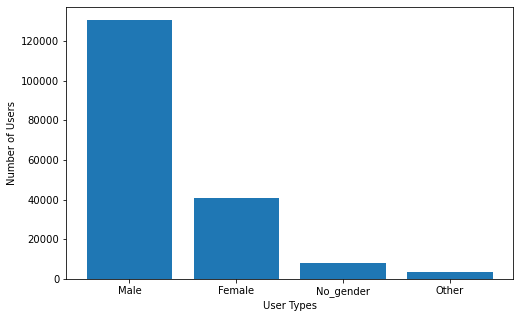

In [23]:
# Bar showing trips by based on gender 
plots(df_clean.member_gender, "User Types", "Number of Users")

From the chart above, we have more male riders than female, others and those that did not indicate their gender.

In [24]:
# Show popular top 10 duration_sec
df_clean_ride_top_10 = df_clean['duration_sec'].value_counts().nlargest(10)
df_clean_ride_top_10

272    311
324    292
323    291
306    291
305    290
369    287
387    286
274    284
354    283
380    282
Name: duration_sec, dtype: int64

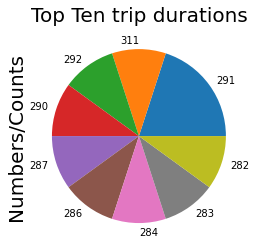

In [25]:
# Pie chart showing top ten trips
df_clean_ride_top_10.value_counts().plot(kind='pie');
plt.title('Top Ten trip durations', fontsize =20)

plt.ylabel('Numbers/Counts', fontsize =20);

A pie chart showing top ten trip durations

In [26]:
# Calculate when most trip happened during the trip
df_clean['start_hours'] = df_clean['start_time'].apply(lambda time: time.hour)

In [27]:
df_clean['start_hours'] = df_clean['start_time'].dt.hour

In [28]:
df_clean['time_of_day'] = 'Morning'
df_clean['time_of_day'][(df_clean['start_hours'] >= 12) & (df_clean['start_hours'] <= 16)] = 'Afternoon'
df_clean['time_of_day'][(df_clean['start_hours'] >= 17) & (df_clean['start_hours'] <= 23)] = 'Night'

C:\Users\Kingsley CVC\AppData\Local\Temp\ipykernel_18664\2187024546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_of_day'][(df_clean['start_hours'] >= 12) & (df_clean['start_hours'] <= 16)] = 'Afternoon'
C:\Users\Kingsley CVC\AppData\Local\Temp\ipykernel_18664\2187024546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_of_day'][(df_clean['start_hours'] >= 17) & (df_clean['start_hours'] <= 23)] = 'Night'


In [29]:
# This will counts days starting from Monday to Sunday.
#df_clean['day_of_the_week'] = df_clean['start_time'].dt.day_of_week
df_clean['day_of_the_week'] = df_clean['start_time'].dt.day_name()
df_clean['day_of_the_week'].value_counts()

Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: day_of_the_week, dtype: int64

In [30]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_clean['days'] = pd.Categorical(df_clean['day_of_the_week'], categories=days, ordered=True)

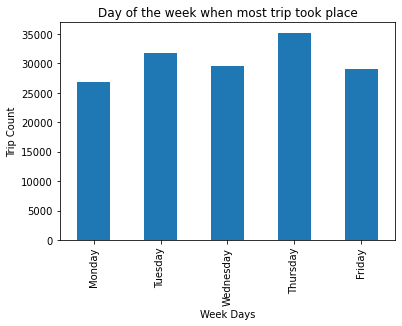

In [51]:
df_clean['days'].value_counts().sort_index().plot(kind = 'bar');
plt.title('Day of the week when most trip took place')
plt.xlabel('Week Days')
plt.ylabel('Trip Count');

From the above result, most trips started on Thursday

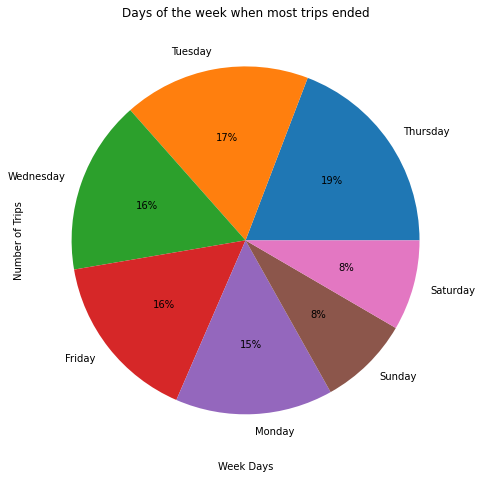

In [32]:
# Day of the week when most trip ended. This will counts days starting from Monday to Sunday.
#df_clean['day_of_the_week'] = df_clean['start_time'].dt.day_of_week
df_clean['day_of_the_wek'] = df_clean['end_time'].dt.day_name()
df_clean['day_of_the_wek'].value_counts()


df_clean['day_of_the_wek'].value_counts().plot(kind ='pie', figsize =(8,8), autopct='%1.0f%%')
plt.title('Days of the week when most trips ended')
plt.xlabel('Week Days')
plt.ylabel('Number of Trips');

The pie chart above shows that most trip ended on Thursdays

In [33]:
df_clean['trip_end'] = df_clean['end_time'].dt.day_name()
df_clean['trip_end'].value_counts()

Thursday     35185
Tuesday      31820
Wednesday    29631
Friday       28981
Monday       26859
Sunday       15523
Saturday     15413
Name: trip_end, dtype: int64

From the results above, most trips start and ends on Thursday

In [34]:
# Show data
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_month_no,end_month_no,start_month,end_month,start_hours,time_of_day,day_of_the_week,days,day_of_the_wek,trip_end
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,2,3,Feb,Mar,17,Night,Thursday,Thursday,Friday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,2,3,Feb,Mar,18,Night,Thursday,Thursday,Friday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,2,3,Feb,Mar,12,Afternoon,Thursday,Thursday,Friday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,2,3,Feb,Mar,17,Night,Thursday,Thursday,Friday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,2,3,Feb,Mar,23,Night,Thursday,Thursday,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday


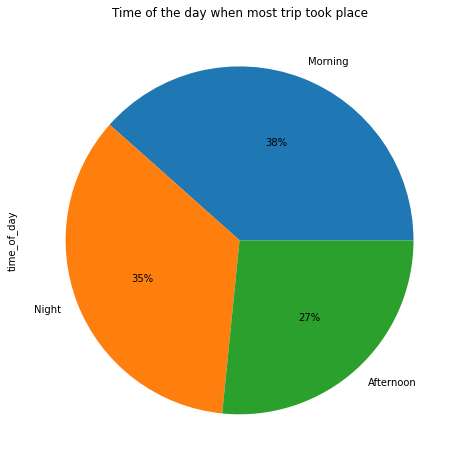

In [35]:
# Find out when most of the trip took place 
df_clean['time_of_day'].value_counts().plot(kind='pie', figsize =(8,8), autopct='%1.0f%%')
plt.title('Time of the day when most trip took place');

From the pie chart above, most trips took place in the morning and decrease toward the afternoon but increase in the evening. 

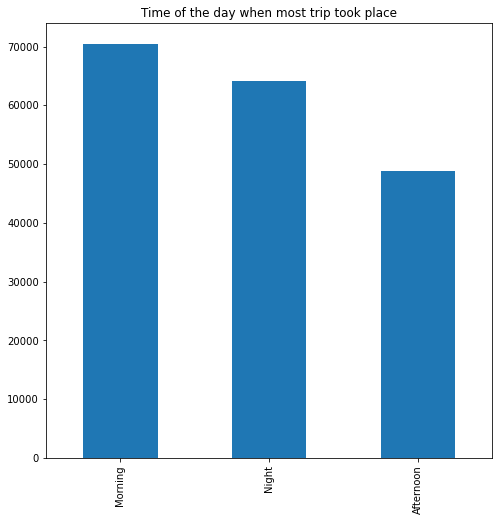

In [36]:
# Find out when most of the trip took place using bar chart
df_clean['time_of_day'].value_counts().plot(kind='bar', figsize =(8,8))
plt.title('Time of the day when most trip took place');

From the above bar chart, most trips took place in the morning and night

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the duration distribution above, I uesd log transform and found that peak duration occurs at 600 seconds (10Minutes) starting from 0 and then distribution starts to dip and does not regain any more peak value. Most trip durations is around 600 seconds which is 10 minutes

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Riders Birth years are converted by substracting the year from current year using a ten year interval starting from 1939 to 2009 so this gives us a distibution for age.
<a id = 'biv'></a>
## Bivariate Exploration



In [37]:
# Function to show percentage of riders based on riders type
def pie_chart(x):
    df.groupby(['user_type', x]).count()['member_birth_year'].plot(kind ='pie', figsize =(8,8), autopct='%1.0f%%')
    return

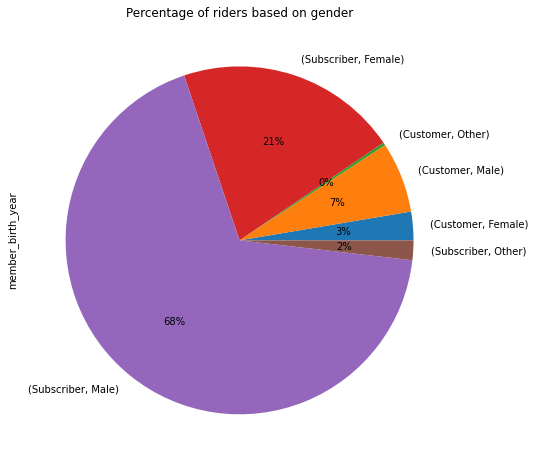

In [38]:
# Pie chart showing percentage of riders
pie_chart(df['member_gender'])
plt.title('Percentage of riders based on gender');

From the pie chart above, 68% males riders are subscibers and 7% are customers while 21% female riders are subscribers and 3% are customers. 2% other riders are subscribers with no customer.

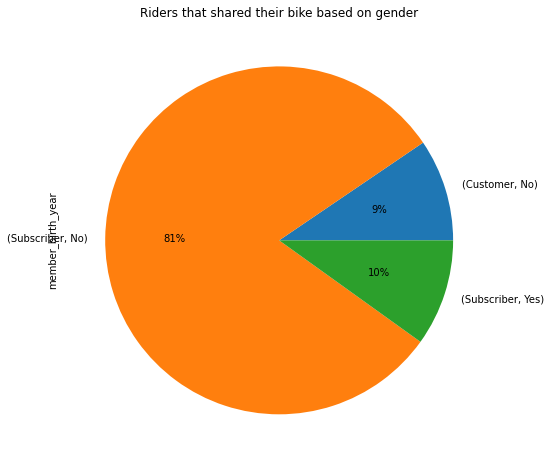

In [39]:
# Pie chart showing Riders that shared their bike based on user types
pie_chart(df['bike_share_for_all_trip'])
plt.title('Riders that shared their bike based on gender');

From the above result, 81% subscribers did not share their bike while 10% did. 9% customers did not share their bike during the trip

In [40]:
df_clean['member_birth_year'].describe()

count    183412.000000
mean       1895.366132
std         411.850439
min           0.000000
25%        1979.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

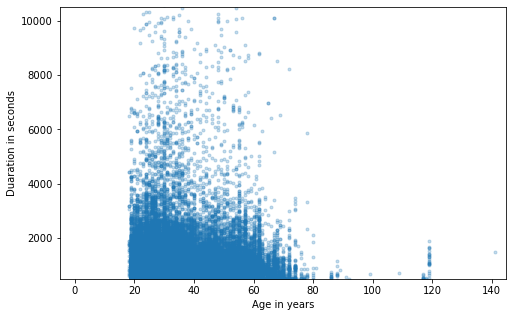

In [41]:
# Correlation between trip duration and age.
plt.figure(figsize=[8,5])
plt.scatter((2019 - df_clean['member_birth_year']), df_clean['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 145, 500, 10500])
plt.xlabel('Age in years')
plt.ylabel('Duaration in seconds')
plt.show()

Most of the trip durations are below 6000 and age is below 80

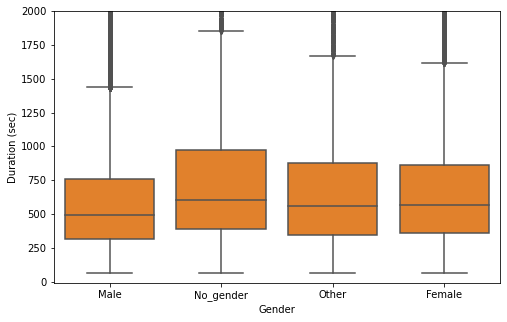

In [42]:
#
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[1]
sns.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.xlabel('Gender')
plt.ylim([-10, 2000])
plt.ylabel('Duration (sec)')
plt.show()

From the above boxplot, Male riders quality is very high compare to other and female but the percentage of female and other riders longer trips then males.

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  Int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  Int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [44]:
# Lists of numeric variables and categorical variables
numeric_vars = ['member_birth_year','duration_sec']
categorical_ars = ['time_of_day','start_weekday_char','start_month']


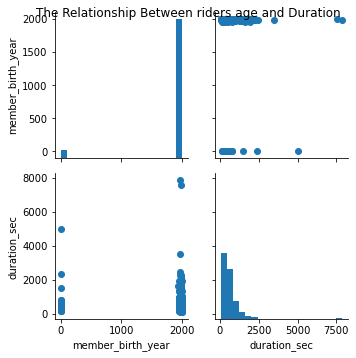

In [45]:
# plot matrix for age and duration using 500 samples. 
samples = np.random.choice(df_clean.shape[0], 500, replace = False)
df_clean_samp = df_clean.loc[samples,:]

g = sns.PairGrid(data = df_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between riders age and Duration');

From the above result, we can see that both the start and end time and duration correlated 

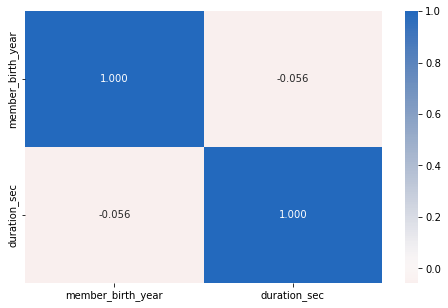

In [46]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that trip durations depends on age. Rider within 20 - 40 years of age has more trip durations that others
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was expecting to see more trip during the weekedn but that was not the case
<a id ="multi"></a>
## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

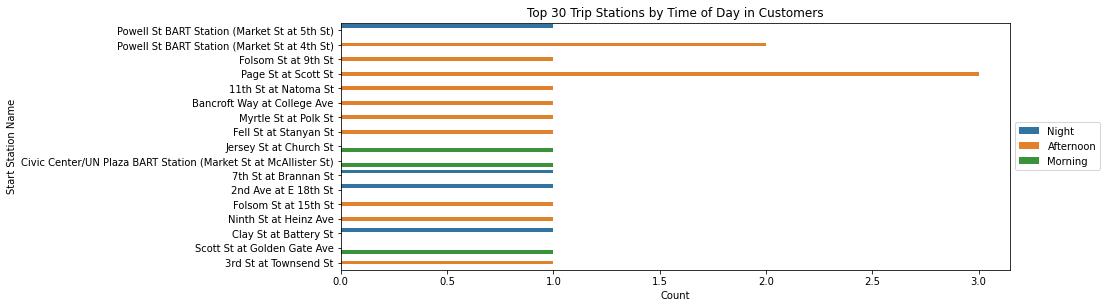

In [47]:
# Using countplot and 3 categorical variables time of day (morning, afternoon, night between), member birth start station name
plt.figure(figsize=(12,10))
ax = plt.subplot(211)
sns.countplot(data=df_clean.nlargest(20, 'duration_sec'), y='start_station_name', hue='time_of_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 30 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

From the plot above, more trips were started from The page St at Scott St in the afternoon.


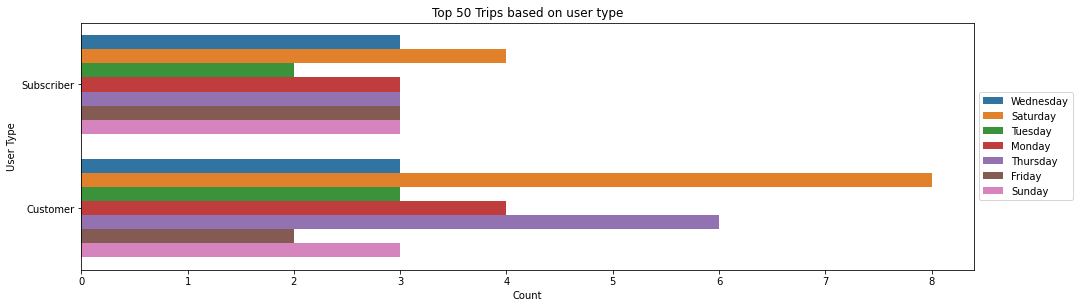

In [48]:
# Using countplot and 3 categorical variables time of day (morning, afternoon, night between), member birth start station name
plt.figure(figsize=(16,10))
ax = plt.subplot(211)
sns.countplot(data=df_clean.nlargest(50, 'duration_sec'), y='user_type', hue='day_of_the_week')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 50 Trips based on user type')
plt.xlabel('Count')
plt.ylabel('User Type');

More customers go on a ride on Saturday

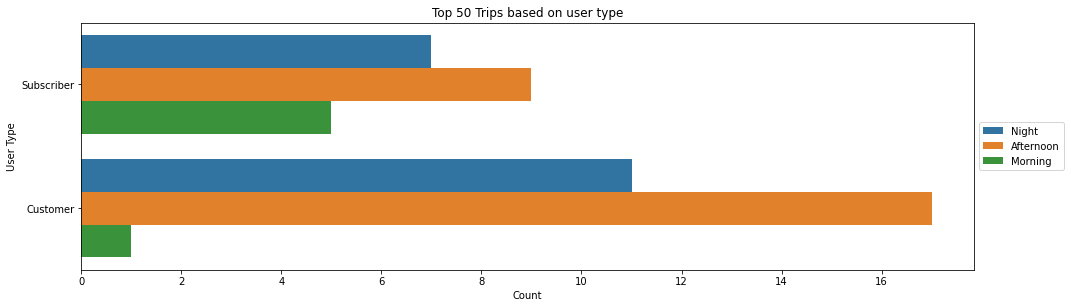

In [49]:
# Using countplot and 3 categorical variables time of day (morning, afternoon, night between), member birth start station name
plt.figure(figsize=(16,10))
ax = plt.subplot(211)
sns.countplot(data=df_clean.nlargest(50, 'duration_sec'), y='user_type', hue='time_of_day')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 50 Trips based on user type')
plt.xlabel('Count')
plt.ylabel('User Type');

More riders prefer to go on a ride in the afternoon and night than in the morning

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> More customers and subscribers ride most in the afternoon  and in the night. More trip started in the afternoon because of the weather situation, more customers and subscibers prefer to go on a ride during certain time of the day which in this case morning and night.

### Were there any interesting or surprising interactions between features?

>I was surprise to see that more customers and subscibers prefer to go on a ride in the afternoon and night and that more customer go on a ride in the afternoon of Thursday and Monday. 

In [50]:
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_month_no,end_month_no,start_month,end_month,start_hours,time_of_day,day_of_the_week,days,day_of_the_wek,trip_end
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,2,3,Feb,Mar,17,Night,Thursday,Thursday,Friday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,2,3,Feb,Mar,18,Night,Thursday,Thursday,Friday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,2,3,Feb,Mar,12,Afternoon,Thursday,Thursday,Friday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,2,3,Feb,Mar,17,Night,Thursday,Thursday,Friday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,2,3,Feb,Mar,23,Night,Thursday,Thursday,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,...,2,2,Feb,Feb,0,Morning,Friday,Friday,Friday,Friday
